#  Calculation of Incident Photon Flux


$$E_{photon} = h\nu=\frac{hc}{\lambda}$$

Photodiode `S120VC` responsivity $[R(\lambda)]=\text{A W}^{-1}$ $$R(\lambda)=\frac{I}{P(\lambda)}$$

where $I$ is current and $P(\lambda)$ is radiant power (radiant flux). At monochromatic irradiation, total incident **molar** photon flux $\left([q_0] = \text{einstein s}^{-1} = \text{mol s}^{-1}\right)$  is calculated as

$$q_0=\frac{P(\lambda)}{N_A E_{photon}(\lambda)}=\frac{P(\lambda) \lambda}{N_Ahc} = \frac{I \lambda}{N_Ahc R(\lambda)} = I \times q_{rel}(\lambda)$$

$$q_{rel}(\lambda) = \frac{\lambda}{N_Ahc R(\lambda)}$$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as c

In [54]:
# works only in colab
! wget https://raw.githubusercontent.com/George-Gershwin/Jupyter-Tutorials/master/Google%20colab/Responsivity-S120VC.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
responsivity = np.loadtxt('Responsivity-S120VC.txt', skiprows=1, delimiter='\t')
responsivity  # first column contains wavelenths, second responsivity in Amp / W

em = np.loadtxt('em_sp.txt', skiprows=1, delimiter='\t')

OSError: em_sp.txt not found.

### Responsivity

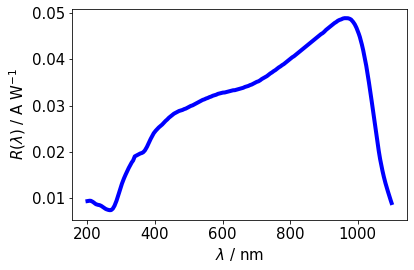

In [13]:
plt.rcParams.update({'font.size': 15})

plt.plot(responsivity[:, 0], responsivity[:, 1], lw=4, color='blue')
plt.xlabel('$\lambda$ / nm')
plt.ylabel('$R(\lambda)$ / A W$^{-1}$')
# plt.show()
plt.tight_layout()
plt.savefig('plot.png', dpi=500, transparent=False)

### $q_{rel}$ calculation

$$q_{rel}(\lambda) = \frac{\lambda}{N_Ahc R(\lambda)}$$

In [57]:
# used constants
print(f'Avogadro constant: {c.N_A}')
print(f'Planck constant: {c.h}')
print(f'Speed of light: {c.c}')

Avogadro constant: 6.02214076e+23
Planck constant: 6.62607015e-34
Speed of light: 299792458.0


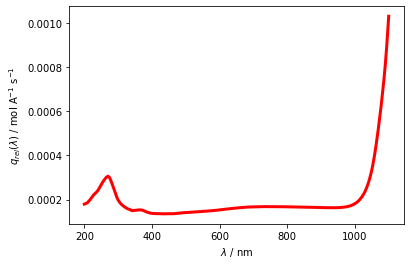

In [58]:
wls = responsivity[:, 0] * 1e-9  # conversion to meters
q_rel = wls / (c.N_A * c.h * c.c * responsivity[:, 1])

plt.plot(responsivity[:, 0], q_rel, lw=3, color='red')
plt.xlabel('$\lambda$ / nm')
plt.ylabel('$q_{rel}(\lambda)$ / mol s$^{-1}$ A$^{-1}$ ')
plt.show()

## $q_0$ calculation

$$q_0 = I \times q_{rel}(\lambda_{irr})$$

In [59]:
irr_wavelength = 336 # 336 nm
q_rel_at_irr = q_rel[int(irr_wavelength - responsivity[0, 0])]

I = 23.3e-6  # 23.3 uA 
q0 = I * q_rel_at_irr

print(f'q0 = {q0:0.3g}')

q0 = 3.58e-09


In [61]:
I * 336e-9 / (c.N_A * c.h * c.c * 1.81e-2)

3.615671689904436e-09

## $q_0$ Calculation with Emission Spectrum

If the irradiation is polychromatic, the precise photon flux has be calculted by integration. The emission spectrum is normalized so that area under the curve is 1: $$\int PDF(\lambda)\mathrm d\lambda = 1$$ The emission spectrum in this case weights the $q_{rel}$ and so is very similar to calculating weighted average. By narrowing the emission spectrum, the calculated value approaches that one with monochromatic approximation.

$$q_0 = I \int q_{rel}(\lambda) PDF(\lambda)\mathrm d\lambda$$

In [63]:
PDF = em[:, 1] / np.trapz(em[:, 1], em[:, 0])  # normalization

NameError: name 'em' is not defined